In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
import folium
import os
import json
from pprint import pprint


In [5]:
path = "Resources/literacy-rate-by-country (2).csv"
happy = "Resources/world_happiness_2017.csv"
lit_df = pd.read_csv(path)
lit_df.columns = ["Country", "Code", "Year", "Literacy rate %"]
lit_df.head()

,Country,Code,Year,Literacy rate %
0,Afghanistan,AFG,2000,28.1
1,Albania,ALB,2011,96.8
2,Algeria,DZA,2006,72.6
3,American Samoa,ASM,1980,97.0
4,Andorra,AND,2011,100.0


In [6]:
happy_df = pd.read_csv(happy)
happy_df.head()

,Country,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.85) + residual,Unnamed: 11,Unnamed: 12
0,Norway,7.537,7.594,7.480,1.616,1.534,0.797,0.635,0.362,0.316,2.277,NaN,NaN
1,Denmark,7.522,7.582,7.462,1.482,1.551,0.793,0.626,0.355,0.401,2.314,NaN,NaN
2,Iceland,7.504,7.622,7.386,1.481,1.611,0.834,0.627,0.476,0.154,2.323,NaN,NaN
3,Switzerland,7.494,7.562,7.426,1.565,1.517,0.858,0.620,0.291,0.367,2.277,NaN,NaN
4,Finland,7.469,7.528,7.410,1.444,1.540,0.809,0.618,0.245,0.383,2.430,NaN,NaN


In [7]:

merged = pd.merge(happy_df, lit_df, on='Country')
merged.head(15)

,Country,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.85) + residual,Unnamed: 11,Unnamed: 12,Code,Year,Literacy rate %
0,Norway,7.537,7.594,7.480,1.616,1.534,0.797,0.635,0.362,0.316,2.277,NaN,NaN,NOR,2011,100.0
1,Denmark,7.522,7.582,7.462,1.482,1.551,0.793,0.626,0.355,0.401,2.314,NaN,NaN,DNK,2003,99.0
2,Iceland,7.504,7.622,7.386,1.481,1.611,0.834,0.627,0.476,0.154,2.323,NaN,NaN,ISL,2003,99.0
3,Switzerland,7.494,7.562,7.426,1.565,1.517,0.858,0.620,0.291,0.367,2.277,NaN,NaN,CHE,2003,99.0
4,Finland,7.469,7.528,7.410,1.444,1.540,0.809,0.618,0.245,0.383,2.430,NaN,NaN,FIN,2000,100.0
5,Netherlands,7.377,7.427,7.327,1.504,1.429,0.811,0.585,0.470,0.283,2.295,NaN,NaN,NLD,2003,99.0
6,Canada,7.316,7.384,7.248,1.479,1.481,0.835,0.611,0.436,0.287,2.187,NaN,NaN,CAN,2003,99.0
7,New Zealand,7.314,7.380,7.248,1.406,1.548,0.817,0.614,0.500,0.383,2.046,NaN,NaN,NZL,2003,99.0
8,Australia,7.284,7.357,7.211,1.484,1.510,0.844,0.602,0.478,0.301,2.065,NaN,NaN,AUS,2003,99.0
9,Sweden,7.284,7.344,7.224,1.494,1.478,0.831,0.613,0.385,0.384,2.098,NaN,NaN,SWE,2003,99.0


In [8]:
path2 = "Resources/mean-years-of-schooling-2017.csv"
mean = pd.read_csv(path2)

mean2017 = mean.loc[mean["Year"] == 2017]
mean2017.columns = ["Country", "Code", "Year", "Ave Yrs"]
mean2017.head()
merged2 = pd.merge(merged, mean2017, on="Country")
merged2.shape

(146, 19)

In [10]:
path4 = "Resources/gender-gap.csv"
gender = pd.read_csv(path4)
gender2 = gender.loc[gender["Year"] == 2015]
gender2.columns= ["Country", "Code", "Year", "% of Female Students"]
gender2.shape

(213, 4)

In [11]:
merge4 = pd.merge(merged2, gender2, on="Country")
merge4.shape

(124, 22)

In [12]:
pathi = "Resources/share-of-individuals-using-the-internet.csv"
int = pd.read_csv(pathi)
int2 = int.loc[int["Year"] == 2015]
merge5 = pd.merge(merge4, int2, on="Country")
merge5.shape
int2.head()

,Country,Code,Year,Individuals using the Internet (% of population) (% of population)
15,Afghanistan,AFG,2015,8.260000
38,Albania,ALB,2015,63.252933
62,Algeria,DZA,2015,38.200000
84,Andorra,AND,2015,96.910000
106,Angola,AGO,2015,12.400000


In [13]:
clean = merge5.loc[:, ["Country", "Happiness score", "Literacy rate %", "Ave Yrs", "% of Female Students", "Individuals using the Internet (% of population) (% of population)"]]
clean.shape

(124, 6)

In [14]:
happy = clean["Happiness score"]
lit = clean["Literacy rate %"]
ave_years = clean["Ave Yrs"]
gender_gap = clean["% of Female Students"]
internet_use = clean["Individuals using the Internet (% of population) (% of population)"]
top = clean.loc[clean["Happiness score"] > 5.5]
top.head(30)

,Country,Happiness score,Literacy rate %,Ave Yrs,% of Female Students,Individuals using the Internet (% of population) (% of population)
0,Norway,7.537,100.0,12.6,48.845112,96.810300
1,Denmark,7.522,99.0,12.6,48.482510,96.330500
2,Iceland,7.504,99.0,12.4,48.957989,98.200000
3,Switzerland,7.494,99.0,13.4,48.585541,87.479056
4,Finland,7.469,100.0,12.4,48.770241,86.422133
5,Netherlands,7.377,99.0,12.2,48.616348,91.724138
6,Canada,7.316,99.0,13.3,48.868729,88.470000
7,New Zealand,7.314,99.0,12.5,48.643791,88.222889
8,Australia,7.284,99.0,12.9,48.604038,84.560519
9,Sweden,7.284,99.0,12.4,49.696491,90.610200


0.6401282344247298
1.2002037960178794e-15


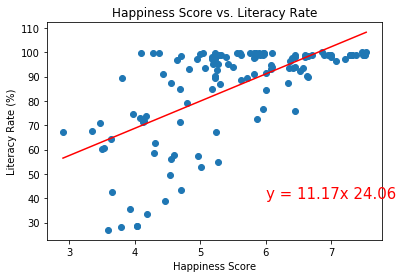

In [27]:
plt.scatter(happy, lit)
plt.xlabel("Happiness Score")
plt.ylabel("Literacy Rate (%)")
plt.title("Happiness Score vs. Literacy Rate")


(slope, intercept, rvalue, pvalue, stderr) = linregress(happy, lit)
regress_values = happy * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
plt.plot(happy,regress_values,"r-")
print(rvalue)
print(pvalue)
plt.savefig("output_data\happiness_vs_literacy")

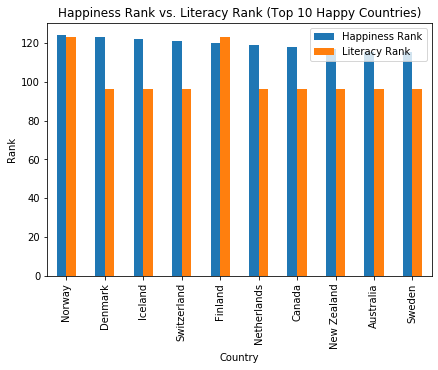

In [28]:
# Happiness Rank vs Population Density
# # Creating a rank for the density with df.rank()
# happy_density_2017[“Population Density Rank”] = happy_density_2017[“Population density (people per sq. km of land area) (people per km² of land area)“].rank(method=‘first’)
# happy_density_2017.head()
clean["Literacy Rank"] = clean["Literacy rate %"].rank()
clean["Happiness Rank"] = clean["Happiness score"].rank()
clean.head(10)
top10 = clean.loc[clean["Happiness Rank"] >= 115.5]
top10.head(15)
happy10 = top10["Happiness Rank"]
lit10 = top10["Literacy Rank"]
#merge5.loc[:, ["Country"
top10_graph = top10.loc[:, ["Country", "Happiness Rank", "Literacy Rank"]]
top10_graph.plot(kind="bar")
x_axis = top10["Country"]
plt.tight_layout()
x_axis = np.arange(len(top10["Country"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, top10["Country"])
plt.xlabel("Country")
plt.ylabel("Rank")
plt.title("Happiness Rank vs. Literacy Rank (Top 10 Happy Countries)")
plt.savefig("output_data\happiness_vs_literacy_top10")

0.7076618042737431
3.982469216791885e-20


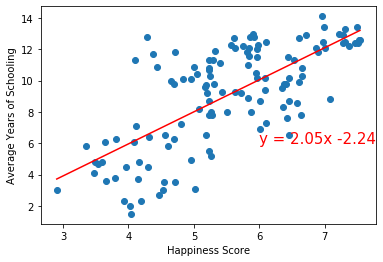

In [17]:
plt.scatter(happy, ave_years)
plt.xlabel("Happiness Score")
plt.ylabel("Average Years of Schooling")

(slope, intercept, rvalue, pvalue, stderr) = linregress(happy, ave_years)
regress_values = happy * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.annotate(line_eq,(6,6),fontsize=15,color="red")
plt.plot(happy,regress_values,"r-")
print(rvalue)
print(pvalue)


0.160518270847224
0.07492551408743274


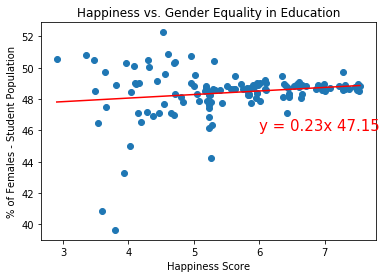

In [29]:
plt.scatter(happy, gender_gap)
plt.xlabel("Happiness Score")
plt.ylabel("% of Females - Student Population")
plt.title("Happiness vs. Gender Equality in Education")
(slope, intercept, rvalue, pvalue, stderr) = linregress(happy, gender_gap)
regress_values = happy * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.annotate(line_eq,(6,46),fontsize=15,color="red")
plt.plot(happy,regress_values,"r-")
print(rvalue)
print(pvalue)
plt.savefig("output_data\happiness_vs_gender-equality-education")

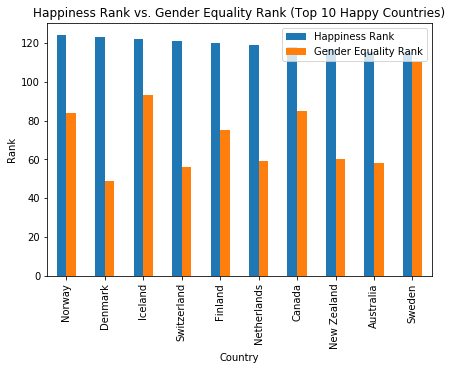

In [30]:
clean["Gender Equality Rank"] = clean["% of Female Students"].rank()
clean["Happiness Rank"] = clean["Happiness score"].rank()
clean.head(10)
top10 = clean.loc[clean["Happiness Rank"] >= 115.5]
top10.head(15)


top10_graph_gender = top10.loc[:, ["Country", "Happiness Rank", "Gender Equality Rank"]]
top10_graph_gender.plot(kind="bar")
x_axis = top10["Country"]
plt.tight_layout()
x_axis = np.arange(len(top10["Country"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, top10["Country"])
plt.xlabel("Country")
plt.ylabel("Rank")
plt.title("Happiness Rank vs. Gender Equality Rank (Top 10 Happy Countries)")
plt.savefig("output_data\happiness_vs_gender-equality-top10")

0.816646791486274
6.6100276404572805e-31


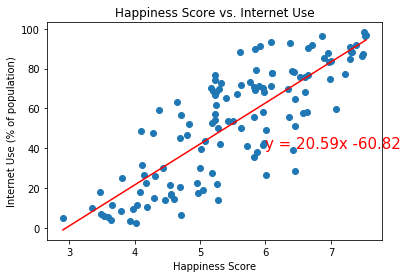

In [31]:
plt.scatter(happy, internet_use)
plt.xlabel("Happiness Score")
plt.ylabel("Internet Use (% of population)")
plt.title("Happiness Score vs. Internet Use")


(slope, intercept, rvalue, pvalue, stderr) = linregress(happy, internet_use)
regress_values = happy * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
plt.plot(happy,regress_values,"r-")
print(rvalue)
print(pvalue)
plt.savefig("output_data\happiness_vs_internet-use")

In [21]:
#correlation between all factors
clean.corr()

,Happiness score,Literacy rate %,Ave Yrs,% of Female Students,Individuals using the Internet (% of population) (% of population),Literacy Rank,Happiness Rank,Gender Equality Rank
Happiness score,1.000000,0.640128,0.707662,0.160518,0.816647,0.609505,0.993144,0.062359
Literacy rate %,0.640128,1.000000,0.879099,0.327674,0.773347,0.845237,0.635282,0.120290
Ave Yrs,0.707662,0.879099,1.000000,0.183091,0.845360,0.896123,0.697043,0.077064
% of Female Students,0.160518,0.327674,0.183091,1.000000,0.170805,0.147581,0.160248,0.784329
Individuals using the Internet (% of population) (% of population),0.816647,0.773347,0.845360,0.170805,1.000000,0.775504,0.810766,0.061124
Literacy Rank,0.609505,0.845237,0.896123,0.147581,0.775504,1.000000,0.599286,0.028847
Happiness Rank,0.993144,0.635282,0.697043,0.160248,0.810766,0.599286,1.000000,0.071069
Gender Equality Rank,0.062359,0.120290,0.077064,0.784329,0.061124,0.028847,0.071069,1.000000


In [34]:
# download file and set the directory where you saved it
country_geo = os.path.join('world-countries.json')
# Initialize the map:
map = folium.Map(location=[48.85, 2.35], tiles="OpenStreetMap", zoom_start=2)
# Add the color for the chloropleth:
map.choropleth(
 geo_data=country_geo,
 name='Literacy',
 data=lit_df,
 columns=['Country','Literacy rate %'],
 key_on='feature.properties.name',
 fill_color='YlGnBu',
    fill_opacity=0.7, line_opacity=0.2,
 legend_name='Literacy (%)'
)
map.save('plot_data.html')
# Import the Folium interactive html file
from IPython.display import HTML
from IPython.display import IFrame

HTML('<iframe src=plot_data.html width=700 height=450></iframe>')


In [24]:
country_geo = os.path.join('world-countries.json')
# Initialize the map:
map = folium.Map(location=[48.85, 2.35], tiles="OpenStreetMap", zoom_start=2)
# Add the color for the chloropleth:
map.choropleth(
 geo_data=country_geo,
 name='Internet Use (% of population)',
 data=int2,
 columns=['Country','Individuals using the Internet (% of population) (% of population)'],
 key_on='feature.properties.name',
 fill_color='YlGnBu',
    fill_opacity=0.7, line_opacity=0.2,
 legend_name='Internet Use'
)
map.save('plot_data.html')
# Import the Folium interactive html file
from IPython.display import IFrame
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

In [25]:
country_geo = os.path.join('world-countries.json')
# Initialize the map:
map = folium.Map(location=[48.85, 2.35], tiles="OpenStreetMap", zoom_start=2)
# Add the color for the chloropleth:
map.choropleth(
 geo_data=country_geo,
 name='Happiness',
 data=happy_df,
 columns=['Country','Happiness score'],
 key_on='feature.properties.name',
 fill_color='YlGnBu',
    fill_opacity=0.7, line_opacity=0.2,
 legend_name='Happiness Score'
)
map.save('plot_data.html')
# Import the Folium interactive html file
from IPython.display import HTML
from IPython.display import IFrame

HTML('<iframe src=plot_data.html width=700 height=450></iframe>')